In [1]:
import os, sys
import dotenv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dotenv.load_dotenv('../.env')    
PATH_DATA = os.environ.get('PATH_OPENSKY') + os.environ.get('PATH_REL_DATA')
PATH_USER_POSTS = PATH_DATA + 'user_posts/'

In [2]:
df = pd.read_csv(os.environ.get('PATH_OPENSKY') + '/results/agg_user_data.csv', index_col=0)
df

,instance,langs,min_date,max_date,mean_sent_score,mean_like_count,mean_reply_count,mean_repost_count,n_posts,caught_exception
288811,bsky.social,jpn,1976-05-31 14:49:40.250,1976-05-31 15:06:01.140,NaN,4.636364,0.000000,0.242424,33.0,False
527934,bsky.social,"eng,heb,jpn,fra",1976-05-30 12:23:51.918,1976-05-31 15:06:22.021,0.824409,18.211009,0.616972,7.187691,2616.0,False
1632691,bsky.social,spa,1976-05-30 13:16:31.226,1976-05-30 13:16:31.226,NaN,2.000000,1.000000,0.000000,1.0,False
1909409,bsky.social,jpn,1976-05-31 14:48:11.431,1976-05-31 14:48:11.431,NaN,1.000000,0.000000,0.000000,1.0,False
2902501,bsky.social,kor,1976-05-30 12:59:01.311,1976-05-31 14:51:00.209,NaN,0.500000,0.100000,0.000000,10.0,False
...,...,...,...,...,...,...,...,...,...,...
495380,bsky.social,eng,1976-05-30 12:40:30.146,1976-05-31 14:48:01.457,0.790667,0.800000,0.173333,0.026667,75.0,False
502241,bsky.social,eng,1976-05-31 14:47:42.021,1976-05-31 14:47:42.304,0.800889,3.777778,1.444444,1.222222,9.0,False
1652601,bsky.social,"spa,eng,cat,jpn",1976-05-30 12:09:11.814,1976-05-31 15:03:31.700,0.770500,87.579186,3.936652,33.321267,221.0,False
1838341,bsky.social,por,1976-05-30 12:23:50.927,1976-05-30 12:24:10.012,NaN,13.600000,1.400000,3.400000,5.0,False


In [3]:
df.langs = df.langs.str.split(',')
df

,instance,langs,min_date,max_date,mean_sent_score,mean_like_count,mean_reply_count,mean_repost_count,n_posts,caught_exception
288811,bsky.social,[jpn],1976-05-31 14:49:40.250,1976-05-31 15:06:01.140,NaN,4.636364,0.000000,0.242424,33.0,False
527934,bsky.social,"[eng, heb, jpn, fra]",1976-05-30 12:23:51.918,1976-05-31 15:06:22.021,0.824409,18.211009,0.616972,7.187691,2616.0,False
1632691,bsky.social,[spa],1976-05-30 13:16:31.226,1976-05-30 13:16:31.226,NaN,2.000000,1.000000,0.000000,1.0,False
1909409,bsky.social,[jpn],1976-05-31 14:48:11.431,1976-05-31 14:48:11.431,NaN,1.000000,0.000000,0.000000,1.0,False
2902501,bsky.social,[kor],1976-05-30 12:59:01.311,1976-05-31 14:51:00.209,NaN,0.500000,0.100000,0.000000,10.0,False
...,...,...,...,...,...,...,...,...,...,...
495380,bsky.social,[eng],1976-05-30 12:40:30.146,1976-05-31 14:48:01.457,0.790667,0.800000,0.173333,0.026667,75.0,False
502241,bsky.social,[eng],1976-05-31 14:47:42.021,1976-05-31 14:47:42.304,0.800889,3.777778,1.444444,1.222222,9.0,False
1652601,bsky.social,"[spa, eng, cat, jpn]",1976-05-30 12:09:11.814,1976-05-31 15:03:31.700,0.770500,87.579186,3.936652,33.321267,221.0,False
1838341,bsky.social,[por],1976-05-30 12:23:50.927,1976-05-30 12:24:10.012,NaN,13.600000,1.400000,3.400000,5.0,False


In [48]:
df = df[~df.mean_sent_score.isna()]
df = df[df.n_posts >= 5]

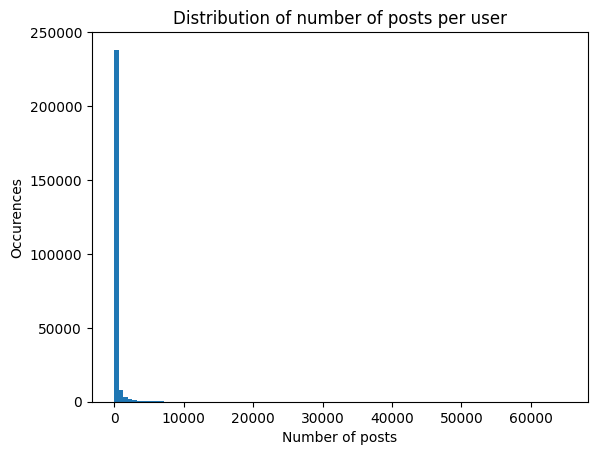

In [50]:
plt.hist(df.n_posts, bins=100)
plt.title('Distribution of number of posts per user')
plt.xlabel('Number of posts')
plt.ylabel('Occurences')
plt.show()

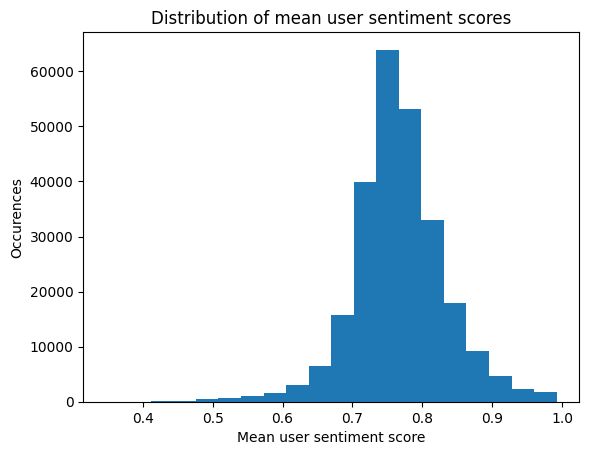

In [51]:
plt.hist(df.mean_sent_score, bins=20)
plt.title('Distribution of mean user sentiment scores')
plt.xlabel('Mean user sentiment score')
plt.ylabel('Occurences')
plt.show()

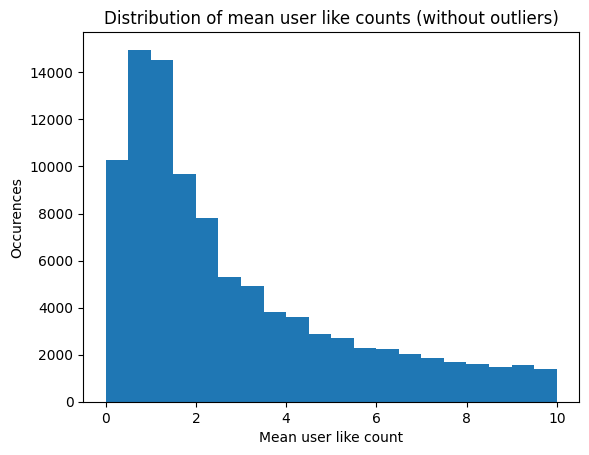

In [52]:
bm_lc_outliers = df.mean_like_count < 10 
plt.hist(df[bm_lc_outliers].mean_like_count, bins=20)
plt.title('Distribution of mean user like counts (without outliers)')
plt.xlabel('Mean user like count')
plt.ylabel('Occurences')
plt.show()

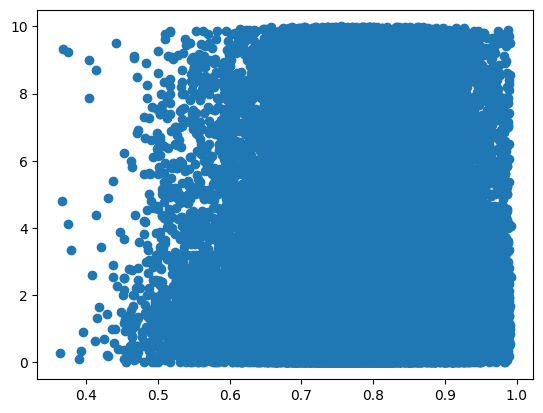

In [53]:
plt.scatter(df[bm_lc_outliers].mean_sent_score, df[bm_lc_outliers].mean_like_count)

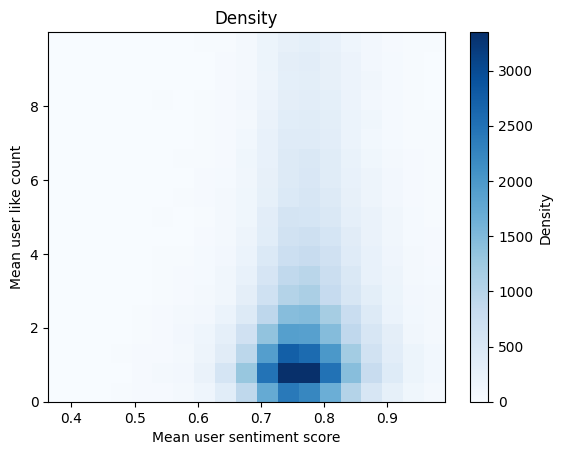

In [54]:
# Create a 2D histogram
gridx = np.linspace(min(df[bm_lc_outliers].mean_sent_score), max(df[bm_lc_outliers].mean_sent_score), 20)
gridy = np.linspace(min(df[bm_lc_outliers].mean_like_count), max(df[bm_lc_outliers].mean_like_count) ,20)
heatmap, xedges, yedges = np.histogram2d(df[bm_lc_outliers].mean_sent_score, df[bm_lc_outliers].mean_like_count, bins=[gridx, gridy])

# Plot the heatmap
myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(heatmap.T, origin='lower', extent=myextent, cmap='Blues', aspect='auto')
plt.colorbar(label='Density')
plt.title('Density')
plt.xlabel('Mean user sentiment score')
plt.ylabel('Mean user like count')
plt.show()

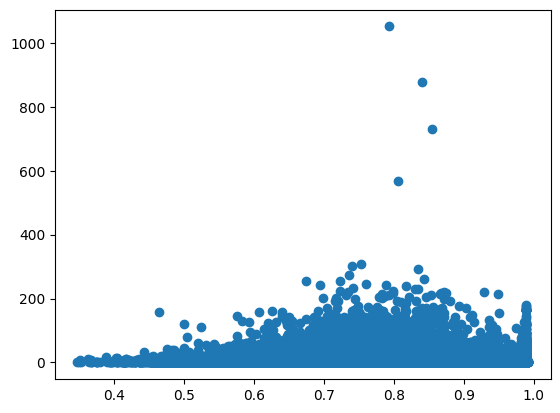

In [55]:
plt.scatter(df[~df.mean_sent_score.isna()].mean_sent_score, df[~df.mean_sent_score.isna()].mean_reply_count)

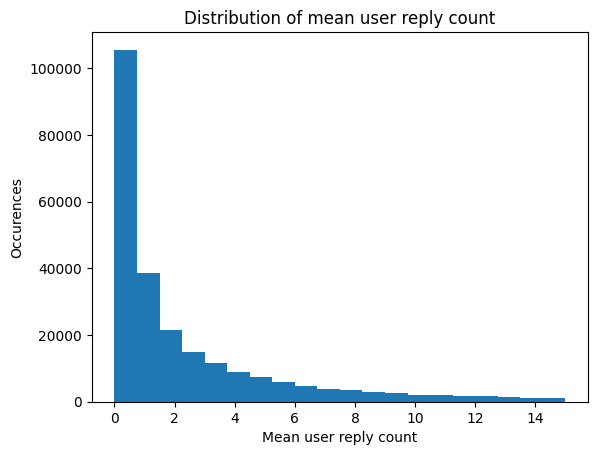

In [74]:
bm_reply_c_outliers = df.mean_reply_count < 15 
plt.hist(df[bm_reply_c_outliers].mean_reply_count, bins=20)
plt.title('Distribution of mean user reply count')
plt.xlabel('Mean user reply count')
plt.ylabel('Occurences')
plt.show()

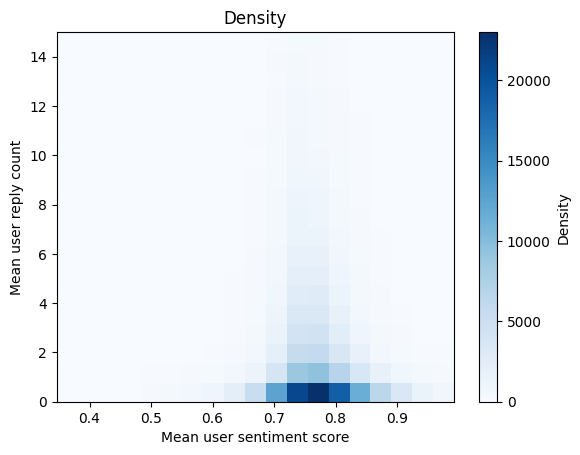

In [75]:
# Create a 2D histogram
gridx = np.linspace(min(df[bm_reply_c_outliers].mean_sent_score), max(df[bm_reply_c_outliers].mean_sent_score), 20)
gridy = np.linspace(min(df[bm_reply_c_outliers].mean_reply_count), max(df[bm_reply_c_outliers].mean_reply_count) ,20)
heatmap, xedges, yedges = np.histogram2d(df[bm_reply_c_outliers].mean_sent_score, df[bm_reply_c_outliers].mean_reply_count, bins=[gridx, gridy])

# Plot the heatmap
myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(heatmap.T, origin='lower', extent=myextent, cmap='Blues', aspect='auto')
plt.colorbar(label='Density')
plt.title('Density')
plt.xlabel('Mean user sentiment score')
plt.ylabel('Mean user reply count')
plt.show()

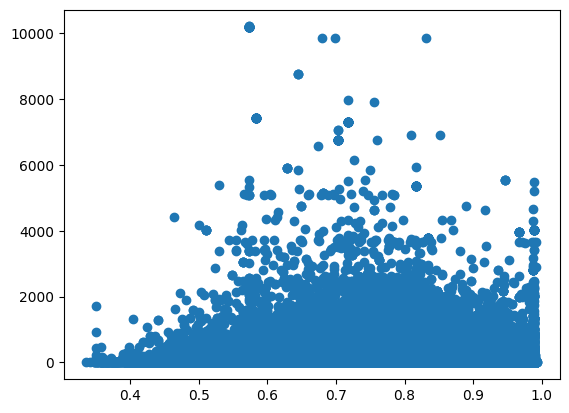

In [10]:
plt.scatter(df[~df.mean_sent_score.isna()].mean_sent_score, df[~df.mean_sent_score.isna()].mean_repost_count)

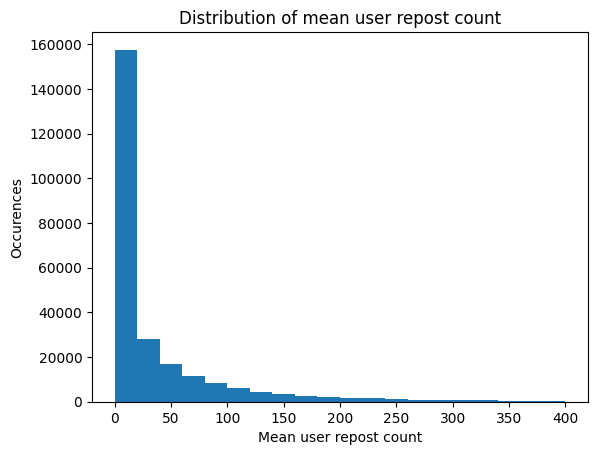

In [80]:
bm_repost_c_outliers = df.mean_repost_count < 400
plt.hist(df[bm_repost_c_outliers].mean_repost_count, bins=20)
plt.title('Distribution of mean user repost count')
plt.xlabel('Mean user repost count')
plt.ylabel('Occurences')
plt.show()

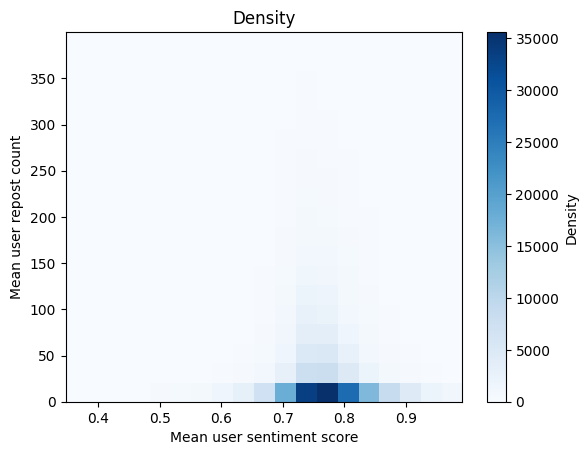

In [81]:
# Create a 2D histogram
gridx = np.linspace(min(df[bm_repost_c_outliers].mean_sent_score), max(df[bm_repost_c_outliers].mean_sent_score), 20)
gridy = np.linspace(min(df[bm_repost_c_outliers].mean_repost_count), max(df[bm_repost_c_outliers].mean_repost_count) ,20)
heatmap, xedges, yedges = np.histogram2d(df[bm_repost_c_outliers].mean_sent_score, df[bm_repost_c_outliers].mean_repost_count, bins=[gridx, gridy])

# Plot the heatmap
myextent  =[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.imshow(heatmap.T, origin='lower', extent=myextent, cmap='Blues', aspect='auto')
plt.colorbar(label='Density')
plt.title('Density')
plt.xlabel('Mean user sentiment score')
plt.ylabel('Mean user repost count')
plt.show()